In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import mylibrary.nnlib as tnn
import mylibrary.dynamicnnlib as tdnn

from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

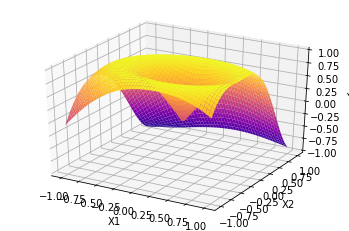

In [3]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [26]:
optimizer = tnn.Adam(0.01)
dynet = tdnn.DynamicNN_Relu([2,2,1], optimizer)

In [27]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

try:
    for epoch in range(100000):
        yout = dynet.forward(xx)
        dy = yout - yy
        dx = dynet.backward(dy)

        dynet.update()

        if epoch%100 == 0:
            error = tnn.MseLoss().loss(yout, yy)
            print(epoch, 'Error = ', error)
            ax.clear()

            ax.scatter(X1, X2, Y)
            ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Y')

            fig.canvas.draw()
            plt.pause(0.01)
    
except Exception as e:
    plt.close()
    if str(e) == 'invalid command name "."':
        print("Closing Tk Plot ")
    else:
        raise e

0 Error =  0.8325149235882913
100 Error =  0.06761943937990902
200 Error =  0.03826972838957601
300 Error =  0.018288561599967078
400 Error =  0.01823549105199926
500 Error =  0.018235488816486584
600 Error =  0.018235488816455387
700 Error =  0.018235488816455384
800 Error =  0.018235488816455394
900 Error =  0.018235488816455387
Closing Tk Plot 


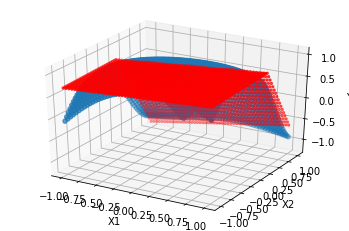

In [28]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

In [39]:
dynet.add_neurons_to_all_possible_layers()

In [40]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
try:
    for epoch in range(100000):
        yout = dynet.forward(xx)
        dy = yout - yy
        dx = dynet.backward(dy)

        dynet.update()

        if epoch%100 == 0:
            error = tnn.MseLoss().loss(yout, yy)
            print(epoch, 'Error = ', error)
            ax.clear()

            ax.scatter(X1, X2, Y)
            ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Y')

            fig.canvas.draw()
            plt.pause(0.01)
    
except Exception as e:
    plt.close()
    if str(e) == 'invalid command name "."':
        print("Closing Tk Plot ")
    else:
        raise e

0 Error =  0.010266329415201477
100 Error =  0.00405274572890865
200 Error =  0.002623556598424166
300 Error =  0.002304219134726193
400 Error =  0.0018482614391127996
500 Error =  0.0015762941644890287
600 Error =  0.0014188914372214097
700 Error =  0.0013034881498389748
800 Error =  0.001173509819485399
900 Error =  0.0011063995556539969
1000 Error =  0.0010654788163631088
1100 Error =  0.0010467562663731048
1200 Error =  0.0010075595355000426
1300 Error =  0.000959467535969458
1400 Error =  0.0008913976204824791
Closing Tk Plot 


In [41]:
# dynet_backup = copy.deepcopy(dynet)
# dynet = copy.deepcopy(dynet_backup)

In [42]:
dynet.start_decaying_removable_shortcut_connections(decay_steps=1500)

In [43]:
rls = dynet.removable_layers
rls

[0, 2]

In [44]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
try:
    for epoch in range(100000):
        yout = dynet.forward(xx)
        dy = yout - yy
        dx = dynet.backward(dy)

        dynet.update()

        if epoch%100 == 0:
            error = tnn.MseLoss().loss(yout, yy)
            print(epoch, 'Error = ', error)
            ax.clear()

            ax.scatter(X1, X2, Y)
            ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Y')

            fig.canvas.draw()
            plt.pause(0.01)
    
except Exception as e:
    plt.close()
    if str(e) == 'invalid command name "."':
        print("Closing Tk Plot ")
    else:
        raise e

0 Error =  0.0008911498617805172
100 Error =  0.0008470710117833864
200 Error =  0.0007754426090973563
300 Error =  0.0007520077441351537
400 Error =  0.000750804197990968
500 Error =  0.0007589238365597299
600 Error =  0.0007787914986127801
700 Error =  0.0007861969852150782
800 Error =  0.0009017406795285168
900 Error =  0.0008656516525701144
1000 Error =  0.0008960358574151489
1100 Error =  0.0009027219814658377
1200 Error =  0.0010360788753814856
1300 Error =  0.001468344444983377
1400 Error =  0.0011984300014737633
1500 Error =  0.0011926409236849484
1600 Error =  0.0013833672754650743
1700 Error =  0.0011294929450292503
1800 Error =  0.0011976118963673062
1900 Error =  0.0010792023757027049
2000 Error =  0.0010754638725694815
2100 Error =  0.0010407135184854405
2200 Error =  0.00103856152669815
Closing Tk Plot 


In [45]:
dynet.layers[rls[0]].weights, dynet.layers[rls[0]].bias

(array([[ 5.52129956e-17,  3.77180925e-14, -6.39961174e-15,
          3.60956924e-14],
        [-1.21283192e-14, -2.01185639e-14, -1.77494738e-14,
          6.63911200e-16]]),
 array([-0.56320754, -0.09071246, -1.55046306,  0.33314118]))

In [46]:
# dynet_backup = copy.deepcopy(dynet)

In [47]:
dynet.remove_decayed_layer()

In [48]:
dynet.layers_dim

[2, 3, 4, 3, 2, 1]

In [49]:
dynet.residuals_dim

[1, 1, 2, 1, 1]

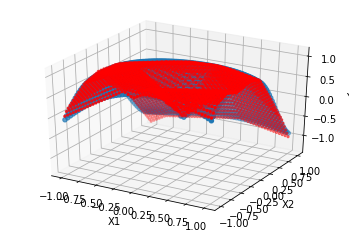

In [50]:
yout = dynet.forward(xx)
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

In [52]:
# dynet_backup = copy.deepcopy(dynet)
# dynet = copy.deepcopy(dynet_backup)

In [53]:
## Find significance of neuron (global perspective required)
## decay the less significant neuron

In [54]:
def find_neuron_significance(self:tdnn.DynamicNN_Relu, dataX, batch_size=None):
    assert len(self.layers) == len(self.residuals_0)
    
    sum_activation = [0]*(len(self.layers))
    count_non_zero = [0]*(len(self.layers))
    std_zee = [0]*(len(self.layers))
    
    sum_activation_res = [0]*(len(self.residuals_0))
    count_non_zero_res = [0]*(len(self.residuals_0))
    std_zee_res = [0]*(len(self.residuals_0))
    
    
    data_size = len(dataX)

    ## do computation on batch wise manner
    if batch_size is None:
        batch_size = data_size
    start = np.arange(0, data_size, batch_size)
    stop = start+batch_size
    if stop[-1]>data_size:
        stop[-1] = data_size

    ### Compute average over the batch
    for idx in range(len(start)):
        activations = dataX[start[idx]:stop[idx]]
        for i in range(len(self.layers)):
            out0 = self.layers[i].forward(activations)
            h0 = self.residuals_0[i].forward(activations)
            h1 = self.residuals_1[i].forward(h0)
            activations = self.relus[i].forward(out0+h1)

            sum_actv = activations.sum(axis=0)
            if i == len(self.layers)-1:
                std_z = activations.std(axis=0)
            else:
                std_z = self.relus[i].x.std(axis=0)
            count_actv = (activations > 0).astype(float).sum(axis=0)
            sum_activation[i] += sum_actv
            count_non_zero[i] += count_actv
            std_zee[i] += std_z
            
            sum_actv_res = h0.sum(axis=0)
            std_z_res = self.residuals_0[i].zee.std(axis=0)
            count_actv_res = (h0 > 0).astype(float).sum(axis=0)
            sum_activation_res[i] += sum_actv_res
            count_non_zero_res[i] += count_actv_res
            std_zee_res[i] += std_z_res
            
    for i in range(len(sum_activation)):
        sum_activation[i] /= data_size
        count_non_zero[i] /= data_size
        std_zee[i] /= len(start)
        sum_activation_res[i] /= data_size
        count_non_zero_res[i] /= data_size
        std_zee_res[i] /= len(start)
    
    mean_activation = sum_activation
    prob_non_zero = count_non_zero

    mean_activation_res = sum_activation_res
    prob_non_zero_res = count_non_zero_res

    ### Compute the significance based on NISP and probability of activation
    significance = []
    significance_res = []
        
    sig_prev = np.ones([1,self.layers[-1].weights.shape[1]])
    for i in reversed(range(len(self.layers))):
    
        fac_res1 = np.abs(self.residuals_1[i].weights.T)
        sig_res1 = sig_prev @ fac_res1 ### significance before residuals_1[i]
#         sig_res1 = sig_res1 * mean_activation_res[i].reshape(1,-1)
        sig_res1 = sig_res1 * prob_non_zero_res[i].reshape(1,-1)
        
        
        fac_res0 = np.abs(self.residuals_0[i].weights.T)
        sig_res0 = sig_res1 @ fac_res0 ### significance before residuals_0[i]
        
        fac = np.abs(self.layers[i].weights).T
        sig_lin = sig_prev @ fac ### significance before the linear
        
        sig = sig_lin + sig_res0 ### significance is gathered from linear and residual
#         sig = sig * mean_activation[i-1].reshape(1,-1)
        sig = sig * prob_non_zero[i-1].reshape(1,-1)


        significance.append(sig)
        significance_res.append(sig_res1)
        sig_prev = sig
        
    significance.reverse()
    significance_res.reverse()
    
    ### rescaling significance by neuron's standard deviation
    ### and scale for division of space.. (half will get maximum value = 1)
    
    for i in range(len(self.layers)):
#         scale_res = 2*np.minimum(prob_non_zero_res[i], 1 - prob_non_zero_res[i])
        scale_res = np.where(prob_non_zero_res[i]<0.5, 1, 1/(prob_non_zero_res[i]+0.001)*(1-prob_non_zero_res[i]))
        scale_res *= std_zee_res[i]
        significance_res[i] *= scale_res
        ### the significance of the linear part should be high (cannot be deleted to bbe on safe side)
        significance_res[i][0,0] = 1.
        
        if i == len(self.layers)-1: break
#         scale = 2*np.minimum(prob_non_zero[i], 1 - prob_non_zero[i])
        scale = np.where(prob_non_zero[i]<0.5, 1, 1/prob_non_zero[i]*(1-prob_non_zero[i]))
        scale *= std_zee[i]
        significance[i+1] *= scale 
        significance[i+1][0,0] = 1.
        ### the significance of neurons preserving the dimensions must be high
        
    del significance[0]
    del prob_non_zero[-1]
    
#     print(significance)
#     print(significance_res)
#     print()
#     print(prob_non_zero)
#     print(prob_non_zero_res)
#     print()
#     print(std_zee)
#     print(std_zee_res)
    
    return significance, significance_res

In [55]:
sig, sig_res = find_neuron_significance(dynet, xx)

In [56]:
sig

[array([[1.        , 0.15451237, 0.10765167]]),
 array([[1.        , 0.37386618, 0.19720028, 0.41513569]]),
 array([[1.        , 0.0260329 , 0.08632677]]),
 array([[1.        , 0.16059128]])]

In [57]:
sig_res

[array([[1.]]),
 array([[1.]]),
 array([[1.        , 0.00529038]]),
 array([[1.]]),
 array([[1.]])]

In [58]:
# def sort_neuron_significance(self:tdnn.DynamicNN_Relu, sig, sig_res):
# #     length = np.sum(self.layers_dim[:-1])
#     all_sig = np.concatenate(sig, axis=1).reshape(-1)
#     all_sig_res = np.concatenate(sig_res, axis=1).reshape(-1)
# #     print(all_sig)
# #     print(all_sig_res)
    
#     si_ = np.argsort(all_sig)
#     si = np.argsort(si_)
# #     print(si)
#     ## last layer and first is not in sig, last of remaining is not needed for split 
#     sort_sig = np.split(si, np.cumsum(self.layers_dim[1:-2]))
    
#     ### Similar for residual
#     si_ = np.argsort(all_sig_res)
#     si = np.argsort(si_)
#     ## last remaining dim is not needed for split 
#     sort_sig_res = np.split(si, np.cumsum(self.residuals_dim[:-1]))

#     return sort_sig, sort_sig_res

def sort_neuron_significance(self:tdnn.DynamicNN_Relu, sig, sig_res):
#     length = np.sum(self.layers_dim[:-1])
    all_sig = np.concatenate(sig, axis=1).reshape(-1)
    all_sig_res = np.concatenate(sig_res, axis=1).reshape(-1)
    
    residual_split_indx = len(all_sig)
    alls = np.concatenate([all_sig, all_sig_res])
#     print(alls)
    si_ = np.argsort(alls)
    si = np.argsort(si_)
#     print(si)
    
    si, si_res = np.split(si, [residual_split_indx])
#     print(si, si_res)
    
    ## last layer and first is not in sig, last of remaining is not needed for split 
    sort_sig = np.split(si, np.cumsum(self.layers_dim[1:-2]))
    
    ## last remaining dim is not needed for split 
    sort_sig_res = np.split(si_res, np.cumsum(self.residuals_dim[:-1]))

    return sort_sig, sort_sig_res

In [59]:
imp, imp_res = sort_neuron_significance(dynet, sig, sig_res)
imp, imp_res

([array([12,  4,  3]),
  array([15,  7,  6,  8]),
  array([14,  1,  2]),
  array([16,  5])],
 [array([11]), array([10]), array([9, 0]), array([13]), array([17])])

In [60]:
def identify_decayable_neurons(self:tdnn.DynamicNN_Relu, sig, sig_res, decay_n, threshold = 0.02):
    importance, importance_res = sort_neuron_significance(self, sig, sig_res)
    dec_neurons_res = {}
    dec_neurons = {}
    for i in range(len(self.layers)):
        ## for residual layers
        unimp = (importance_res[i] < decay_n).astype(int)
#         print(unimp)
#         print(sig_res[i] > threshold)
        ## neuron is important if its  importance is more than threshold
        unimp[sig_res[i].reshape(-1) > threshold] *= 0
        unimp = np.nonzero(unimp)[0]
#         dec_neurons_res.append(unimp)
        if len(unimp)>0:
            dec_neurons_res[i] = unimp
        
        if i == len(self.layers)-1: break
        ## for normal layers
        unimp = (importance[i] < decay_n).astype(int)
        unimp[sig[i].reshape(-1) > threshold] *= 0
        unimp_ = np.nonzero(unimp)[0]
        ## the layers must have enough dimension to preserve the dimension of incoming&outgoing
        min_dim = min(self.layers_dim[i], self.layers_dim[i+2])
#         print(unimp_, min_dim, self.layers_dim[i+1]-len(unimp_))
        if self.layers_dim[i+1]-len(unimp_) < min_dim:
            keep_indx = np.argsort(sig[i].reshape(-1))[-min_dim:]
            unimp[keep_indx] *= 0
            unimp_ = np.nonzero(unimp)[0]
            
#         dec_neurons.append(unimp_)
        if len(unimp_)>0:
            dec_neurons[i] = unimp_
        
    return dec_neurons, dec_neurons_res

In [61]:
decay_neurons, decay_neurons_res = identify_decayable_neurons(dynet, sig, sig_res, 4, 0.1)
decay_neurons, decay_neurons_res

({2: array([1])}, {2: array([1])})

In [62]:
sig

[array([[1.        , 0.15451237, 0.10765167]]),
 array([[1.        , 0.37386618, 0.19720028, 0.41513569]]),
 array([[1.        , 0.0260329 , 0.08632677]]),
 array([[1.        , 0.16059128]])]

In [63]:
sig_res

[array([[1.]]),
 array([[1.]]),
 array([[1.        , 0.00529038]]),
 array([[1.]]),
 array([[1.]])]

In [64]:
print(dynet.layers_dim)

[2, 3, 4, 3, 2, 1]


In [72]:
dynet_backup = copy.deepcopy(dynet)
# dynet = copy.deepcopy(dynet_backup)

In [73]:
def set_neuron_decay_rate(self:tdnn.DynamicNN_Relu, decay, decay_res, steps=500):
    self.neuron_decay_rate = {}
    self.neuron_decay_rate2 = {}
    self.neuron_res_decay_rate = {}
    self.neuron_decay_steps = steps
    for li, neurons in decay.items():
        self.neuron_decay_rate[li] = self.layers[li+1].weights[neurons]/steps
        self.neuron_decay_rate2[li] = self.residuals_0[li+1].weights[neurons]/steps
    for rli, neurons in decay_res.items():
        self.neuron_res_decay_rate[rli] = self.residuals_1[rli].weights[neurons]/steps
    pass

def decay_removable_neurons(self:tdnn.DynamicNN_Relu, decay, decay_res):
    if self.neuron_decay_steps > 0:
        for li, neurons in decay.items():
            self.layers[li+1].weights[neurons] -= self.neuron_decay_rate[li]
            self.residuals_0[li+1].weights[neurons] -= self.neuron_decay_rate2[li]
    #         self.neuron_decay_rate[li] = self.layers[li+1].weights[neurons]/steps
        for rli, neurons in decay_res.items():
    #         self.neuron_res_decay_rate[rli] = self.residuals_1[rli].weights[neurons]/steps
            self.residuals_1[rli].weights[neurons] -= self.neuron_res_decay_rate[rli]
        self.neuron_decay_steps -= 1
    pass

def freeze_removable_neurons(self:tdnn.DynamicNN_Relu, decay, decay_res):
    for li, neurons in decay.items():
        self.layers[li+1].del_weights[neurons] *= 0.
        self.residuals_0[li+1].del_weights[neurons] *= 0.
        self.layers[li].del_weights[:,neurons] *= 0.
            
    for rli, neurons in decay_res.items():
        self.residuals_1[rli].del_weights[neurons] *= 0.
        self.residuals_0[rli].del_weights[:, neurons] *= 0.
            
    pass

In [74]:
set_neuron_decay_rate(dynet, decay_neurons, decay_neurons_res, 1000)

In [75]:
dynet.neuron_decay_rate

{2: array([[-0.00039137, -0.00060338]])}

In [76]:
dynet.neuron_res_decay_rate

{2: array([[-5.41086772e-04, -2.55555551e-04, -2.76922902e-06]])}

In [77]:
# decay_removable_neurons(dynet, decay_neurons, decay_neurons_res)

In [78]:
# freeze_removable_neurons(dynet, decay_neurons, decay_neurons_res)

In [79]:
# dynet.layers[1].del_weights

In [80]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
try:
    for epoch in range(100000):
        decay_removable_neurons(dynet, decay_neurons, decay_neurons_res)
        
        yout = dynet.forward(xx)
        dy = yout - yy
        dx = dynet.backward(dy)
        
        freeze_removable_neurons(dynet, decay_neurons, decay_neurons_res)
        
        dynet.update()

        if epoch%100 == 0:
            error = tnn.MseLoss().loss(yout, yy)
            print(epoch, 'Error = ', error)
            ax.clear()

            ax.scatter(X1, X2, Y)
            ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Y')

            fig.canvas.draw()
            plt.pause(0.01)
    
except Exception as e:
    plt.close()
    if str(e) == 'invalid command name "."':
        print("Closing Tk Plot ")
    else:
        raise e

0 Error =  0.0010385164855885936
100 Error =  0.0010371295519174147
200 Error =  0.0010285768964902245
300 Error =  0.0010273277273110829
400 Error =  0.001034768749165566
500 Error =  0.0010469668149975621
600 Error =  0.0010662993008365628
700 Error =  0.0010913800358624203
800 Error =  0.0011223774132958823
900 Error =  0.0011563021407317545
1000 Error =  0.0011944342158278604
1100 Error =  0.0011680420314908728
1200 Error =  0.001144509126828753
1300 Error =  0.001140958502308261
1400 Error =  0.0010989526851607266
1500 Error =  0.0011025046020739656
1600 Error =  0.0010873221779627456
1700 Error =  0.0010295877916206195
1800 Error =  0.0010193772058252025
Closing Tk Plot 


In [82]:
i=2
dynet.layers[i+1].weights

array([[ 8.10695592e-01,  1.10616197e+00],
       [ 4.28791117e-15, -4.11823353e-15],
       [-7.00015949e-01, -9.60179971e-01]])

In [83]:
dynet.layers[i].weights

array([[-0.30701517, -0.38772785,  0.45249131],
       [-2.03660211, -1.72253616,  0.10325446],
       [ 0.55809626,  0.40536635, -0.23528762],
       [-0.08973542, -0.15542047,  0.02838375]])

In [84]:
dynet_backup = copy.deepcopy(dynet)
# dynet = copy.deepcopy(dynet_backup)

In [85]:
def remove_decayed_neurons(self:tdnn.DynamicNN_Relu, decay, decay_res):
    for li, neurons in decay.items():
#         a=np.delete(self.layers[li+1].weights, (neurons), axis=0)
#         print(a, self.layers[li+1].weights.shape)
#         b = np.delete(self.layers[li].weights, (neurons), axis=1)
#         print(b, self.layers[li].weights.shape)
#         c = np.delete(self.layers[li].bias, (neurons), axis=0)
#         print(c, self.layers[li].bias.shape)
        self.layers[li+1].weights = np.delete(self.layers[li+1].weights, (neurons), axis=0)
        self.layers[li+1].weightsOpt = self.optimizer.set_parameter(self.layers[li+1].weights)
        
        self.residuals_0[li+1].weights = np.delete(self.residuals_0[li+1].weights, (neurons), axis=0)
        self.residuals_0[li+1].weightsOpt = self.optimizer.set_parameter(self.residuals_0[li+1].weights)

        self.layers[li].weights = np.delete(self.layers[li].weights, (neurons), axis=1)
        self.layers[li].weightsOpt = self.optimizer.set_parameter(self.layers[li].weights)

        self.layers[li].bias = np.delete(self.layers[li].bias, (neurons), axis=0)
        self.layers[li].biasOpt = self.optimizer.set_parameter(self.layers[li].bias)
        
        self.residuals_1[li].weights = np.delete(self.residuals_1[li].weights, (neurons), axis=1)
        self.residuals_1[li].weightsOpt = self.optimizer.set_parameter(self.residuals_1[li].weights)

        self.residuals_1[li].bias = np.delete(self.residuals_1[li].bias, (neurons), axis=0)
        self.residuals_1[li].biasOpt = self.optimizer.set_parameter(self.residuals_1[li].bias)
        
    for rli, neurons in decay_res.items():
        self.residuals_1[rli].weights = np.delete(self.residuals_1[rli].weights, (neurons), axis=0)
        self.residuals_1[rli].weightsOpt = self.optimizer.set_parameter(self.residuals_1[rli].weights)

        self.residuals_0[rli].weights = np.delete(self.residuals_0[rli].weights, (neurons), axis=1)
        self.residuals_0[rli].weightsOpt = self.optimizer.set_parameter(self.residuals_0[rli].weights)
        
        self.residuals_0[rli].bias = np.delete(self.residuals_0[rli].bias, (neurons), axis=0)
        self.residuals_0[rli].biasOpt = self.optimizer.set_parameter(self.residuals_0[rli].bias)
    pass

In [86]:
remove_decayed_neurons(dynet, decay_neurons, decay_neurons_res)

In [87]:
dynet.layers[2].weights

array([[-0.30701517,  0.45249131],
       [-2.03660211,  0.10325446],
       [ 0.55809626, -0.23528762],
       [-0.08973542,  0.02838375]])

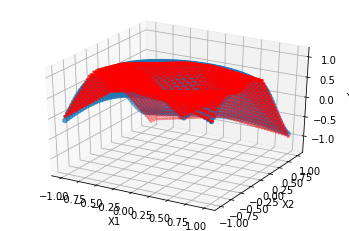

In [88]:
yout = dynet.forward(xx)
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
fig.canvas.draw()

In [517]:
i=2
dynet.layers[i].weights.shape, dynet.layers[i].bias.shape 

((3, 3), (3,))

In [518]:
dynet.residuals_0[i].weights.shape, dynet.residuals_1[i].weights.shape, dynet.residuals_1[i].bias.shape 

((4, 2), (2, 3), (3,))